## CODE INFORMATION:

This is code that given a train route (a start and an end) will download the data for and create a histogram of the trains on that route's arrival delays at its end between 2021 and 2022.

In [14]:
import requests
from matplotlib import pyplot as plt
import numpy as np
import os
import math

# List of Trains

In [15]:
# Set and fix the dictionary

# All trains with a sample size of <= 105 from Jan 1 2021 to Dec 31 2022 have had their destinations checked and verified

# Bugged Number Fixes
# 1297 Origin changed to NYP, Destination changed to ALB
# 27 Origin changed to SPK
# 448 Origin changed to CHI
# 550 Origin changed to OAC, Destination changed to SAC

# Changed Destinations to most common destination
# 1105 Destination changed to WPR
# 1106 Destination changed to DEN
# 146 Destination changed to NYP
# 1567 Destination chcnged to OSD
# 167 Destination changed to NYP
# 1765 Destination changed to OSD
# 1777 Destination changed to OSD
# 1785 Destination changed to OSD
# 350 Destination changed to PNT
# 525 Destination changed to OKJ
# 536 Destination changed to SAC
# 711 Destination changed to OKJ
# 742 Destination changed to SAC
# 821 Destination changes to FTW

# Unchanged Destinations Despite Being Uncommon
# 152: Often would go to BOS near end of timeframe. Still sometimes only goes to NYP
# 153: Always would go to NFK near end of timeframe, switched in July 2022
# 169: Often would go to WAS near end of timeframe. Still sometimes only goes to NYP
# 154: Always would go to BOS near end of timeframe, switched in May 2022
# 1763 stopped at GTA 5 times and OSD 6 times. GTA is more recent so we go with that. 
# 184: Always would go to BOS near end of timeframe, switched in April 2022
# 185: Always would go to NFK near end of timeframe, switched in July 2022
# 529 did not operate between April and September 2022, then changed destination from OKJ to SJC.
# 662 is about half NYP, half PHL, so keep NYP as final Destination
# 674: Always would go to NYP near end of timeframe, switched in October 2022

# Changed Origins to most common origin
# 1105 Origin changed to DEN
# 1106 Origin changed to WPR
# 1774 Origin changed to OSD
# 1784 Origin changed to OSD
# 822 Origin changed to FTW

trainDict = {
  1 : [ "NOL" , "LAX" ],
  1003 : [ "CHI" , "LAX" ],
  1004 : [ "LAX" , "CHI" ],
  1005 : [ "CHI" , "EMY" ],
  1006 : [ "EMY" , "CHI" ],
  1007 : [ "CHI" , "SEA" ],
  1008 : [ "SEA" , "CHI" ],
  1011 : [ "SAC" , "LAX" ],
  1014 : [ "KFS" , "SEA" ],
  1027 : [ "SPK" , "PDX" ],
  1028 : [ "PDX" , "CHI" ],
  1058 : [ "NOL" , "CHI" ],
  1059 : [ "CHI" , "NOL" ],
  11 : [ "SEA" , "LAX" ],
  1105 : [ "DEN" , "WPR" ],
  1106 : [ "WPR" , "DEN" ],
  111 : [ "NYP" , "WAS" ],
  1135 : [ "BOS" , "WAS" ],
  1158 : [ "NOL" , "CHI" ],
  1164 : [ "WAS" , "BOS" ],
  1173 : [ "BOS" , "WAS" ],
  1186 : [ "WAS" , "BOS" ],
  1195 : [ "NYP" , "WAS" ],
  121 : [ "NYP" , "WAS" ],
  122 : [ "WAS" , "NYP" ],
  123 : [ "NYP" , "WAS" ],
  1234 : [ "PIT" , "ALB" ],
  1235 : [ "NYP" , "PIT" ],
  124 : [ "NPN" , "NYP" ],
  1244 : [ "PIT" , "NYP" ],
  1245 : [ "ALB" , "PIT" ],
  125 : [ "NYP" , "NPN" ],
  126 : [ "WAS" , "NYP" ],
  129 : [ "NYP" , "WAS" ],
  1297 : [ "NYP" , "ALB" ],
  130 : [ "WAS" , "NYP" ],
  132 : [ "WAS" , "BOS" ],
  134 : [ "WAS" , "NYP" ],
  135 : [ "BOS" , "WAS" ],
  136 : [ "WAS" , "SPG" ],
  137 : [ "BOS" , "WAS" ],
  138 : [ "NFK" , "NYP" ],
  139 : [ "BOS" , "WAS" ],
  14 : [ "LAX" , "SEA" ],
  140 : [ "WAS" , "SPG" ],
  141 : [ "SPG" , "WAS" ],
  143 : [ "SPG" , "WAS" ],
  145 : [ "NYP" , "RNK" ],
  146 : [ "WAS" , "NYP" ],
  147 : [ "SPG" , "RNK" ],
  148 : [ "WAS" , "SPG" ],
  149 : [ "BOS" , "WAS" ],
  150 : [ "NYP" , "BOS" ],
  151 : [ "NYP" , "RNK" ],
  152 : [ "WAS" , "BOS" ],
  153 : [ "NYP" , "NFK" ],
  154 : [ "WAS" , "BOS" ],
  155 : [ "NYP" , "WAS" ],
  156 : [ "RNK" , "NYP" ],
  1562 : [ "OSD" , "SAN" ],
  1564 : [ "LAX" , "SAN" ],
  1567 : [ "SAN" , "OSD" ],
  157 : [ "SPG" , "NFK" ],
  1572 : [ "LAX" , "SAN" ],
  1579 : [ "SAN" , "OSD" ],
  158 : [ "NFK" , "NYP" ],
  1584 : [ "LAX" , "SAN" ],
  159 : [ "NYP" , "WAS" ],
  1590 : [ "OSD" , "SAN" ],
  160 : [ "NYP" , "BOS" ],
  161 : [ "BOS" , "WAS" ],
  162 : [ "WAS" , "BOS" ],
  163 : [ "BOS" , "WAS" ],
  164 : [ "RVM" , "BOS" ],
  165 : [ "BOS" , "WAS" ],
  166 : [ "WAS" , "BOS" ],
  167 : [ "BOS" , "NYP" ],
  168 : [ "WAS" , "BOS" ],
  1689 : [ "BON" , "BRK" ],
  169 : [ "BOS" , "WAS" ],
  170 : [ "WAS" , "BOS" ],
  171 : [ "BOS" , "RNK" ],
  172 : [ "WAS" , "BOS" ],
  173 : [ "BOS" , "WAS" ],
  174 : [ "NPN" , "BOS" ],
  175 : [ "BOS" , "WAS" ],
  176 : [ "RNK" , "BOS" ],
  1761 : [ "SAN" , "SLO" ],
  1763 : [ "SAN" , "GTA" ],
  1765 : [ "SAN" , "OSD" ],
  1767 : [ "SAN" , "LAX" ],
  1768 : [ "GTA" , "SAN" ],
  177 : [ "BOS" , "WAS" ],
  1770 : [ "GTA" , "SAN" ],
  1774 : [ "OSD" , "SAN" ],
  1777 : [ "SAN" , "OSD" ],
  178 : [ "WAS" , "BOS" ],
  1784 : [ "OSD" , "SAN" ],
  1785 : [ "SAN" , "OSD" ],
  179 : [ "BOS" , "NYP" ],
  1790 : [ "OSD" , "SAN" ],
  1793 : [ "SAN" , "OSD" ],
  1794 : [ "SLO" , "OXN" ],
  1796 : [ "GTA" , "OXN" ],
  180 : [ "WAS" , "NYP" ],
  181 : [ "NYP" , "WAS" ],
  182 : [ "WAS" , "NYP" ],
  183 : [ "NYP" , "WAS" ],
  184 : [ "MET" , "BOS" ],
  185 : [ "NYP" , "NFK" ],
  186 : [ "NPN" , "NYP" ],
  189 : [ "NYP" , "WAS" ],
  19 : [ "NYP" , "NOL" ],
  190 : [ "NYP" , "BOS" ],
  192 : [ "WAS" , "NYP" ],
  193 : [ "NYP" , "WAS" ],
  194 : [ "NPN" , "BOS" ],
  195 : [ "BOS" , "RVM" ],
  196 : [ "WAS" , "NYP" ],
  198 : [ "WAS" , "NYP" ],
  2 : [ "LAX" , "NOL" ],
  20 : [ "NOL" , "NYP" ],
  21 : [ "CHI" , "SAS" ],
  2103 : [ "NYP" , "WAS" ],
  2106 : [ "WAS" , "NYP" ],
  2107 : [ "NYP" , "WAS" ],
  2109 : [ "NYP" , "WAS" ],
  2121 : [ "NYP" , "WAS" ],
  2122 : [ "WAS" , "NYP" ],
  2126 : [ "WAS" , "NYP" ],
  2128 : [ "WAS" , "NYP" ],
  2150 : [ "WAS" , "BOS" ],
  2151 : [ "BOS" , "WAS" ],
  2152 : [ "WAS" , "BOS" ],
  2153 : [ "BOS" , "WAS" ],
  2154 : [ "WAS" , "BOS" ],
  2155 : [ "BOS" , "WAS" ],
  2156 : [ "WAS" , "BOS" ],
  2158 : [ "WAS" , "BOS" ],
  2159 : [ "BOS" , "WAS" ],
  2160 : [ "WAS" , "BOS" ],
  2163 : [ "BOS" , "WAS" ],
  2164 : [ "WAS" , "BOS" ],
  2165 : [ "BOS" , "WAS" ],
  2166 : [ "WAS" , "BOS" ],
  2167 : [ "BOS" , "WAS" ],
  2168 : [ "WAS" , "BOS" ],
  2169 : [ "BOS" , "WAS" ],
  2170 : [ "WAS" , "BOS" ],
  2172 : [ "WAS" , "BOS" ],
  2173 : [ "BOS" , "WAS" ],
  2175 : [ "BOS" , "WAS" ],
  2190 : [ "NYP" , "BOS" ],
  2193 : [ "BOS" , "NYP" ],
  22 : [ "SAS" , "CHI" ],
  2203 : [ "NYP" , "WAS" ],
  2205 : [ "NYP" , "WAS" ],
  2213 : [ "NYP" , "WAS" ],
  2217 : [ "NYP" , "WAS" ],
  2218 : [ "WAS" , "NYP" ],
  2220 : [ "WAS" , "NYP" ],
  2222 : [ "WAS" , "NYP" ],
  2224 : [ "WAS" , "NYP" ],
  2226 : [ "WAS" , "NYP" ],
  2233 : [ "BOS" , "WAS" ],
  2235 : [ "BOS" , "WAS" ],
  2239 : [ "BOS" , "WAS" ],
  2248 : [ "WAS" , "BOS" ],
  2249 : [ "BOS" , "WAS" ],
  2250 : [ "WAS" , "BOS" ],
  2251 : [ "BOS" , "WAS" ],
  2252 : [ "WAS" , "BOS" ],
  2253 : [ "BOS" , "WAS" ],
  2254 : [ "WAS" , "BOS" ],
  2255 : [ "BOS" , "WAS" ],
  2256 : [ "WAS" , "BOS" ],
  2257 : [ "BOS" , "WAS" ],
  2259 : [ "BOS" , "WAS" ],
  2260 : [ "WAS" , "BOS" ],
  2275 : [ "BOS" , "WAS" ],
  2290 : [ "NYP" , "BOS" ],
  2292 : [ "NYP" , "BOS" ],
  230 : [ "ALB" , "NYP" ],
  232 : [ "ALB" , "NYP" ],
  233 : [ "NYP" , "ALB" ],
  234 : [ "ALB" , "NYP" ],
  235 : [ "NYP" , "ALB" ],
  236 : [ "ALB" , "NYP" ],
  237 : [ "NYP" , "ALB" ],
  238 : [ "ALB" , "NYP" ],
  239 : [ "NYP" , "ALB" ],
  240 : [ "ALB" , "NYP" ],
  241 : [ "NYP" , "ALB" ],
  243 : [ "NYP" , "ALB" ],
  244 : [ "ALB" , "NYP" ],
  250 : [ "ALB" , "NYP" ],
  253 : [ "NYP" , "ALB" ],
  255 : [ "NYP" , "ALB" ],
  256 : [ "ALB" , "NYP" ],
  259 : [ "NYP" , "ALB" ],
  260 : [ "ALB" , "NYP" ],
  261 : [ "NYP" , "ALB" ],
  27 : [ "SPK" , "PDX" ],
  28 : [ "PDX" , "SPK" ],
  280 : [ "NFL" , "NYP" ],
  281 : [ "NYP" , "NFL" ],
  283 : [ "NYP" , "NFL" ],
  284 : [ "NFL" , "NYP" ],
  29 : [ "WAS" , "CHI" ],
  290 : [ "RUD" , "NYP" ],
  291 : [ "NYP" , "BTN" ],
  292 : [ "RUD" , "NYP" ],
  293 : [ "NYP" , "RUD" ],
  295 : [ "NYP" , "RUD" ],
  296 : [ "RUD" , "NYP" ],
  3 : [ "CHI" , "LAX" ],
  30 : [ "CHI" , "WAS" ],
  300 : [ "STL" , "CHI" ],
  301 : [ "CHI" , "STL" ],
  302 : [ "STL" , "CHI" ],
  303 : [ "CHI" , "STL" ],
  304 : [ "STL" , "CHI" ],
  305 : [ "CHI" , "STL" ],
  306 : [ "STL" , "CHI" ],
  307 : [ "CHI" , "STL" ],
  311 : [ "STL" , "KCY" ],
  313 : [ "STL" , "KCY" ],
  314 : [ "KCY" , "STL" ],
  316 : [ "KCY" , "STL" ],
  318 : [ "KCY" , "CHI" ],
  319 : [ "CHI" , "KCY" ],
  329 : [ "CHI" , "MKE" ],
  330 : [ "MKE" , "CHI" ],
  331 : [ "CHI" , "MKE" ],
  332 : [ "MKE" , "CHI" ],
  333 : [ "CHI" , "MKE" ],
  334 : [ "MKE" , "CHI" ],
  335 : [ "CHI" , "MKE" ],
  336 : [ "MKE" , "CHI" ],
  337 : [ "CHI" , "MKE" ],
  338 : [ "MKE" , "CHI" ],
  339 : [ "CHI" , "MKE" ],
  340 : [ "MKE" , "CHI" ],
  341 : [ "CHI" , "MKE" ],
  342 : [ "MKE" , "CHI" ],
  343 : [ "CHI" , "MKE" ],
  350 : [ "CHI" , "PNT" ],
  351 : [ "PNT" , "CHI" ],
  352 : [ "CHI" , "PNT" ],
  353 : [ "PNT" , "CHI" ],
  354 : [ "CHI" , "PNT" ],
  355 : [ "PNT" , "CHI" ],
  364 : [ "CHI" , "PTH" ],
  365 : [ "PTH" , "CHI" ],
  370 : [ "CHI" , "GRR" ],
  371 : [ "GRR" , "CHI" ],
  380 : [ "QCY" , "CHI" ],
  381 : [ "CHI" , "QCY" ],
  382 : [ "QCY" , "CHI" ],
  383 : [ "CHI" , "QCY" ],
  390 : [ "CDL" , "CHI" ],
  391 : [ "CHI" , "CDL" ],
  392 : [ "CDL" , "CHI" ],
  393 : [ "CHI" , "CDL" ],
  4 : [ "LAX" , "CHI" ],
  400 : [ "SPG" , "GFD" ],
  405 : [ "SPG" , "NHV" ],
  409 : [ "SPG" , "NHV" ],
  412 : [ "NHV" , "SPG" ],
  416 : [ "NHV" , "SPG" ],
  417 : [ "SPG" , "NHV" ],
  42 : [ "PGH" , "NYP" ],
  43 : [ "NYP" , "PGH" ],
  432 : [ "NHV" , "SPG" ],
  448 : [ "CHI" , "BOS" ],
  449 : [ "BOS" , "ALB" ],
  450 : [ "NHV" , "SPG" ],
  451 : [ "SPG" , "NHV" ],
  458 : [ "NHV" , "SPG" ],
  460 : [ "NHV" , "SPG" ],
  461 : [ "GFD" , "NHV" ],
  463 : [ "SPG" , "NHV" ],
  464 : [ "NHV" , "SPG" ],
  465 : [ "SPG" , "NHV" ],
  467 : [ "SPG" , "NHV" ],
  470 : [ "NHV" , "SPG" ],
  471 : [ "GFD" , "NHV" ],
  473 : [ "SPG" , "NHV" ],
  474 : [ "NHV" , "SPG" ],
  475 : [ "SPG" , "NHV" ],
  476 : [ "NHV" , "SPG" ],
  478 : [ "NHV" , "GFD" ],
  479 : [ "SPG" , "NHV" ],
  48 : [ "CHI" , "NYP" ],
  488 : [ "NHV" , "GFD" ],
  49 : [ "NYP" , "CHI" ],
  490 : [ "NHV" , "SPG" ],
  494 : [ "NHV" , "GFD" ],
  495 : [ "GFD" , "NHV" ],
  497 : [ "SPG" , "NHV" ],
  499 : [ "GFD" , "SPG" ],
  5 : [ "CHI" , "EMY" ],
  50 : [ "CHI" , "NYP" ],
  500 : [ "EUG" , "SEA" ],
  502 : [ "PDX" , "SEA" ],
  503 : [ "SEA" , "EUG" ],
  504 : [ "PDX" , "SEA" ],
  505 : [ "SEA" , "EUG" ],
  507 : [ "SEA" , "PDX" ],
  508 : [ "EUG" , "SEA" ],
  509 : [ "SEA" , "PDX" ],
  51 : [ "NYP" , "CHI" ],
  516 : [ "SEA" , "VAC" ],
  519 : [ "VAC" , "SEA" ],
  52 : [ "SFA" , "LOR" ],
  520 : [ "OKJ" , "SAC" ],
  521 : [ "SAC" , "SJC" ],
  522 : [ "OKJ" , "SAC" ],
  523 : [ "SAC" , "SJC" ],
  524 : [ "SJC" , "SAC" ],
  525 : [ "SAC" , "OKJ" ],
  526 : [ "OKJ" , "SAC" ],
  527 : [ "ARN" , "SJC" ],
  528 : [ "SJC" , "SAC" ],
  529 : [ "ARN" , "SJC" ],
  53 : [ "LOR" , "SFA" ],
  531 : [ "SAC" , "SJC" ],
  532 : [ "SJC" , "SAC" ],
  533 : [ "OKJ" , "SJC" ],
  534 : [ "OKJ" , "SAC" ],
  535 : [ "SAC" , "OKJ" ],
  536 : [ "OKJ" , "SAC" ],
  537 : [ "SAC" , "SJC" ],
  538 : [ "SJC" , "ARN" ],
  54 : [ "WAS" , "SAB" ],
  540 : [ "OKJ" , "SAC" ],
  541 : [ "SAC" , "SJC" ],
  542 : [ "SJC" , "SAC" ],
  543 : [ "SAC" , "OKJ" ],
  544 : [ "SJC" , "SAC" ],
  545 : [ "SAC" , "OKJ" ],
  546 : [ "SJC" , "SAC" ],
  547 : [ "SAC" , "SJC" ],
  548 : [ "OKJ" , "SAC" ],
  549 : [ "SAC" , "OKJ" ],
  55 : [ "SAB" , "WAS" ],
  550 : [ "OAC" , "SAC" ],
  551 : [ "SAC" , "OKJ" ],
  552 : [ "SJC" , "SAC" ],
  56 : [ "WAS" , "SAB" ],
  562 : [ "LAX" , "SAN" ],
  564 : [ "LAX" , "SAN" ],
  567 : [ "SAN" , "LAX" ],
  568 : [ "LAX" , "SAN" ],
  569 : [ "SAN" , "LAX" ],
  57 : [ "SAB" , "WAS" ],
  572 : [ "LAX" , "SAN" ],
  573 : [ "SAN" , "LAX" ],
  579 : [ "SAN" , "LAX" ],
  58 : [ "NOL" , "CHI" ],
  580 : [ "LAX" , "SAN" ],
  581 : [ "SAN" , "LAX" ],
  583 : [ "SAN" , "LAX" ],
  584 : [ "LAX" , "SAN" ],
  586 : [ "LAX" , "SAN" ],
  588 : [ "LAX" , "SAN" ],
  589 : [ "SAN" , "LAX" ],
  59 : [ "CHI" , "NOL" ],
  590 : [ "LAX" , "SAN" ],
  591 : [ "SAN" , "LAX" ],
  593 : [ "SAN" , "LAX" ],
  594 : [ "LAX" , "SAN" ],
  595 : [ "SAN" , "LAX" ],
  6 : [ "EMY" , "CHI" ],
  600 : [ "HAR" , "NYP" ],
  601 : [ "PHL" , "HAR" ],
  605 : [ "PHL" , "HAR" ],
  607 : [ "PHL" , "HAR" ],
  609 : [ "NYP" , "HAR" ],
  610 : [ "HAR" , "PHL" ],
  611 : [ "PHL" , "HAR" ],
  612 : [ "HAR" , "PHL" ],
  615 : [ "PHL" , "HAR" ],
  618 : [ "HAR" , "PHL" ],
  619 : [ "PHL" , "HAR" ],
  620 : [ "HAR" , "PHL" ],
  622 : [ "HAR" , "PHL" ],
  624 : [ "HAR" , "NYP" ],
  63 : [ "NYP" , "TWO" ],
  637 : [ "NYP" , "PHL" ],
  638 : [ "PHL" , "NYP" ],
  639 : [ "NYP" , "PHL" ],
  64 : [ "TWO" , "NYP" ],
  640 : [ "HAR" , "NYP" ],
  641 : [ "NYP" , "HAR" ],
  642 : [ "HAR" , "NYP" ],
  643 : [ "NYP" , "HAR" ],
  644 : [ "HAR" , "NYP" ],
  645 : [ "NYP" , "HAR" ],
  646 : [ "HAR" , "NYP" ],
  647 : [ "NYP" , "HAR" ],
  648 : [ "HAR" , "NYP" ],
  649 : [ "NYP" , "HAR" ],
  65 : [ "BOS" , "NPN" ],
  650 : [ "HAR" , "NYP" ],
  651 : [ "NYP" , "HAR" ],
  652 : [ "HAR" , "NYP" ],
  653 : [ "NYP" , "HAR" ],
  654 : [ "HAR" , "NYP" ],
  655 : [ "NYP" , "HAR" ],
  656 : [ "HAR" , "NYP" ],
  657 : [ "NYP" , "HAR" ],
  658 : [ "HAR" , "NYP" ],
  66 : [ "RNK" , "BOS" ],
  660 : [ "HAR" , "NYP" ],
  661 : [ "NYP" , "HAR" ],
  662 : [ "HAR" , "NYP" ],
  663 : [ "NYP" , "HAR" ],
  664 : [ "HAR" , "NYP" ],
  665 : [ "NYP" , "HAR" ],
  666 : [ "HAR" , "NYP" ],
  667 : [ "NYP" , "HAR" ],
  669 : [ "NYP" , "HAR" ],
  67 : [ "BOS" , "NPN" ],
  670 : [ "HAR" , "NYP" ],
  671 : [ "NYP" , "HAR" ],
  672 : [ "HAR" , "NYP" ],
  674 : [ "HAR" , "NYP" ],
  68 : [ "ALB" , "NYP" ],
  680 : [ "BRK" , "BON" ],
  681 : [ "BON" , "BRK" ],
  682 : [ "BRK" , "BON" ],
  683 : [ "BON" , "BRK" ],
  684 : [ "BRK" , "BON" ],
  685 : [ "BON" , "BRK" ],
  686 : [ "BRK" , "BON" ],
  687 : [ "BON" , "BRK" ],
  688 : [ "BRK" , "BON" ],
  689 : [ "BON" , "BRK" ],
  69 : [ "NYP" , "ALB" ],
  690 : [ "BRK" , "BON" ],
  691 : [ "BON" , "BRK" ],
  692 : [ "BRK" , "BON" ],
  693 : [ "BON" , "BRK" ],
  694 : [ "BRK" , "BON" ],
  695 : [ "BON" , "BRK" ],
  696 : [ "BRK" , "BON" ],
  697 : [ "BON" , "BRK" ],
  698 : [ "BRK" , "BON" ],
  699 : [ "BON" , "BRK" ],
  7 : [ "CHI" , "SEA" ],
  702 : [ "SAC" , "BFD" ],
  703 : [ "BFD" , "SAC" ],
  710 : [ "OKJ" , "BFD" ],
  711 : [ "BFD" , "OKJ" ],
  712 : [ "OKJ" , "BFD" ],
  713 : [ "BFD" , "OKJ" ],
  714 : [ "OKJ" , "BFD" ],
  715 : [ "BFD" , "OKJ" ],
  716 : [ "OKJ" , "BFD" ],
  717 : [ "BFD" , "OKJ" ],
  718 : [ "OAC" , "BFD" ],
  719 : [ "BFD" , "OKJ" ],
  720 : [ "OKJ" , "SAC" ],
  723 : [ "SAC" , "SJC" ],
  724 : [ "SJC" , "SAC" ],
  727 : [ "SAC" , "SJC" ],
  728 : [ "SJC" , "SAC" ],
  729 : [ "ARN" , "SJC" ],
  73 : [ "RGH" , "CLT" ],
  732 : [ "SJC" , "SAC" ],
  733 : [ "SAC" , "OAC" ],
  734 : [ "OKJ" , "SAC" ],
  736 : [ "SJC" , "ARN" ],
  737 : [ "SAC" , "SJC" ],
  738 : [ "SJC" , "SAC" ],
  74 : [ "CLT" , "RGH" ],
  741 : [ "SAC" , "SJC" ],
  742 : [ "SJC" , "SAC" ],
  743 : [ "SAC" , "SJC" ],
  744 : [ "SJC" , "SAC" ],
  745 : [ "SAC" , "OKJ" ],
  746 : [ "OKJ" , "SAC" ],
  747 : [ "SAC" , "SJC" ],
  748 : [ "SJC" , "SAC" ],
  749 : [ "SAC" , "OKJ" ],
  75 : [ "RGH" , "CLT" ],
  751 : [ "SAC" , "OKJ" ],
  76 : [ "CLT" , "RGH" ],
  761 : [ "SAN" , "SLO" ],
  763 : [ "SAN" , "GTA" ],
  765 : [ "SAN" , "GTA" ],
  767 : [ "SAN" , "LAX" ],
  768 : [ "GTA" , "SAN" ],
  77 : [ "RGH" , "CLT" ],
  770 : [ "GTA" , "SAN" ],
  774 : [ "SLO" , "SAN" ],
  777 : [ "SAN" , "SLO" ],
  78 : [ "CLT" , "RGH" ],
  784 : [ "GTA" , "SAN" ],
  785 : [ "SAN" , "GTA" ],
  79 : [ "NYP" , "CLT" ],
  794 : [ "SLO" , "LAX" ],
  796 : [ "GTA" , "SAN" ],
  8 : [ "SEA" , "CHI" ],
  80 : [ "CLT" , "NYP" ],
  82 : [ "NFK" , "BOS" ],
  821 : [ "OKC" , "FTW" ],
  822 : [ "FTW" , "OKC" ],
  84 : [ "NFK" , "NYP" ],
  85 : [ "BOS" , "RVM" ],
  86 : [ "RVM" , "BOS" ],
  87 : [ "BOS" , "NFK" ],
  88 : [ "NFK" , "BOS" ],
  89 : [ "NYP" , "SAV" ],
  90 : [ "SAV" , "NYP" ],
  91 : [ "NYP" , "MIA" ],
  92 : [ "MIA" , "NYP" ],
  93 : [ "BOS" , "NFK" ],
  94 : [ "NFK" , "BOS" ],
  95 : [ "BOS" , "NFK" ],
  96 : [ "NPN" , "BOS" ],
  97 : [ "NYP" , "MIA" ],
  98 : [ "MIA" , "NYP" ],
  99 : [ "BOS" , "NPN" ],
}

# List of all Train Routes

In [16]:
trainRoutes = { }
for x in trainDict:
    if (trainRoutes.get(trainDict[x][0]) == None):
        trainRoutes[trainDict[x][0]] = []
    trainRoutes[trainDict[x][0]].append(trainDict[x][1])

# Assign Each Train to a Route

In [17]:
routeTrains = { }
for x in trainRoutes:
    for y in range(len(trainRoutes[x])):
        routeTrains[tuple([x, trainRoutes[x][y]])] = []
        
for x in trainDict:
    routeTrains[tuple([trainDict[x][0], trainDict[x][1]])].append(x)

# Inputs

In [18]:
# One of these 2 must exist, other can be ""
# Number can be entered as "30*", "2100-2200", "3,4,5,6" or "all"
startCity = "BOS"
endCity = "WAS"

# Create the Histogram

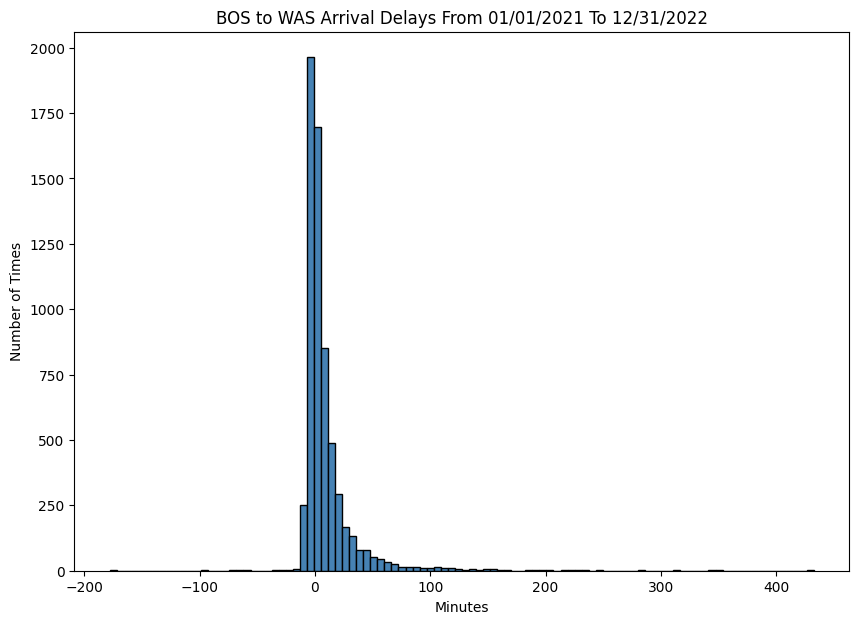

Mean 9.245461720599842
Median 2.0
Variance 604.254981377185


In [19]:
# Make a histogram of a train's arrival delay times at a given station over a given time frame
trainNumbers = routeTrains[(startCity, endCity)]
number = ""
for x in trainNumbers:
    number = number + str(x) + "%2C"
number = number[:-3]
station = endCity

# Must all exist
start_month = "01"
start_day = "01"
start_year = "2021"

# Don't have to exist if only looking at one day
# If only looking at one day, can be ""
end_month = "12"
end_day = "31"
end_year = "2022"

# All these must exist
sunday = "1"
monday = "1"
tuesday = "1"
wednesday = "1"
thursday = "1"
friday = "1"
saturday = "1"

# Must exist
# Should be "d_dp" or "d_ar"
delay_type = "d_ar"

# Must exist
# "DESC" or "ASC"
order = "DESC"

# Must exist
# "gt", "gteq", "eq", "lteq", "lt"
sign = "gt"

# Optional, can be ""
minutes = ""

# Keep at 1
# Setting to zero ignores weekday inputs
# Set to zero if you always want every day of the week
dfon = "1"

URL = "https://juckins.net/amtrak_status/archive/html/history.php?"
URL = URL + "train_num=" + number
URL = URL + "&station=" + station
URL = URL + "&date_start=" + start_month + "%2F" + start_day + "%2F" + start_year
URL = URL + "&date_end=" + end_month + "%2F" + end_day + "%2F" + end_year
URL = URL + "&df1=" + sunday + "&df2=" + monday + "&df3=" + tuesday + "&df4=" + wednesday + "&df5=" + thursday + "&df6=" + friday + "&df7=" + saturday
URL = URL + "&sort=" + delay_type + "&sort_dir=" + order
URL = URL + "&co=" + sign + "&limit_mins=" + minutes + "&dfon=" + dfon
page = requests.get(URL)

listDelays = []
toFind = "</span></td><td style=\"text-align: center;\">"
length = len(toFind)
searching = page.text.find(toFind)
while (searching != -1) :
    end = page.text.find("<", searching + length)
    delayNumber = int(page.text[searching+length:end])
    listDelays.append(delayNumber)
    searching = page.text.find(toFind, end)

delays = np.asarray(listDelays)

# Creating histogram
wanted_bins = 100

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(delays, bins = wanted_bins, ec='black', color = "steelblue")
plt.xlabel('Minutes') 
plt.ylabel('Number of Times') 
graphTitle = startCity + " to " + endCity + " Arrival Delays From " + \
    start_month + "/" + start_day + "/" + start_year + \
    " To " + end_month + "/" + end_day + "/" + end_year
plt.title(graphTitle)
plt.show()

# Report some data
print("Mean", np.mean(delays))
print("Median", np.median(delays))
print("Variance", np.var(delays))

# Next Goals

# General Histogram Analysis:
# Look at percentiles
# Approximate specific routes with distributions (Prob not needed since we have every value)
# Calculate chance delay is less than a time/amount based on past routes
# Literally just count historical delays less than a time out of total

# Web Scrapers:
# Look at making a web scraper for airline delays
# Look at making a web scraper for weather on days/in timeframes

# Airlines:
# Choose airlines to compare to trains
# Compare all delays from trains and airplanes to see which is typically faster or has less delays
# See train is faster than plane x percent of the time
# Sort by speed to make analysis easy (second slowest train is faster than any planes that slowest train is also faster than)
# Check which is less likely to be delayed by a certain amount
# If both guarenteed to be delayed by at most a certain amount, see percentage of which is more likely to be faster

# Amtrak Routes
# Rank all amtrak trains by mean and median delay at final stop
# Include train number, origin, destination, delay, and line in each rank
# Add new list, normalizing each route by route length. Something like delay / length
# Analyze places where the most delayed trains are more likely to become delayed (stop by stop analysis)
# All time and over past year
# https://en.wikipedia.org/wiki/List_of_Amtrak_routes#Current_routes
# http://kevinkorell.com/btn/numt0100.htm